<a href="https://colab.research.google.com/github/PrinceChaudhary1962/Tweet-Analyzer/blob/main/TweetAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-dotenv


In [ ]:
!pip install tweepy transformers yfinance


In [2]:
# WARNING: Never share this if uploading to GitHub
API_KEY = "xqoaIUk3nniXTuh3RFQicmUs5"
API_SECRET = "eybT4W4oZL58M6VANkVd7TAhGDFKJRBoBHzfpiZzWBTC3mavSf"
ACCESS_TOKEN = "1946980738017939456-4O4I4MA857RchhVlcgjmMSxb4Lrd1P"
ACCESS_TOKEN_SECRET = "nYf1nGNa0QbOYqRtnhjohWXGG42vDJfiE1Yzn21M7ZyWx"


In [3]:
import tweepy
import pandas as pd

# Authenticate with Twitter API
auth = tweepy.OAuth1UserHandler(API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

# Test authentication
try:
    print("✅ Authenticated as:", api.verify_credentials().screen_name)
except:
    print("❌ Authentication failed. Check your credentials.")


✅ Authenticated as: SMILEYRaj0802


In [4]:
import tweepy
import pandas as pd

# Replace with your bearer token
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAPSi3AEAAAAAkHZTec7FlE1fS5%2B8dLUlHw6%2BIuE%3DZILoWziPhS2AiwkudIKXGXQ7WIKI6EUra0i6HA6DRji2fUWqXw"

client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Define search query and max tweets
query = "Tesla -is:retweet lang:en"
max_results = 50  # max 100 per request for recent search

response = client.search_recent_tweets(
    query=query,
    max_results=max_results,
    tweet_fields=["created_at", "text", "author_id"]
)

# Collect results
tweets = response.data
tweet_list = []

if tweets:
    for tweet in tweets:
        tweet_list.append({
            "created_at": tweet.created_at,
            "author_id": tweet.author_id,
            "text": tweet.text
        })

df = pd.DataFrame(tweet_list)
df.head()


,created_at,author_id,text
0,2025-07-30 07:28:00+00:00,1206298156364754944,@grok @RichardGage_911 @elonmusk @FBI @DOGE @Y...
1,2025-07-30 07:27:44+00:00,300363814,"@SawyerMerritt @Tesla Cool, so my car won’t ju..."
2,2025-07-30 07:27:40+00:00,1387580416673173504,please please please she is going to take ever...
3,2025-07-30 07:27:38+00:00,1941523355959689236,@dariusprincip @tesla_na WALLET-TO-WALLET FUND...
4,2025-07-30 07:27:32+00:00,510468105,@Tesla should skip opening in California. Don...


In [5]:
from transformers import pipeline

# Load sentiment classifier
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Run sentiment analysis on tweets
results = classifier(df["text"].tolist(), truncation=True)

# Add sentiment results to DataFrame
df["label"] = [r["label"] for r in results]
df["score"] = [r["score"] for r in results]

# Show results
df[["text", "label", "score"]].head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


,text,label,score
0,@grok @RichardGage_911 @elonmusk @FBI @DOGE @Y...,NEGATIVE,0.988362
1,"@SawyerMerritt @Tesla Cool, so my car won’t ju...",NEGATIVE,0.881722
2,please please please she is going to take ever...,NEGATIVE,0.999032
3,@dariusprincip @tesla_na WALLET-TO-WALLET FUND...,NEGATIVE,0.527799
4,@Tesla should skip opening in California. Don...,NEGATIVE,0.999669


In [6]:
df.to_csv("tweet_sentiments.csv", index=False)
print("✅ Saved to tweet_sentiments.csv")


✅ Saved to tweet_sentiments.csv


In [7]:
!pip install matplotlib


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")


In [9]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# 🔁 Apply sentiment function
df["sentiment"] = df["text"].apply(get_sentiment)


In [10]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.date  # just date part

sentiment_over_time = df.groupby(['created_at', 'sentiment']).size().unstack(fill_value=0)
sentiment_over_time.head()


sentiment,Negative,Neutral,Positive
created_at,,,
2025-07-30,11,6,33


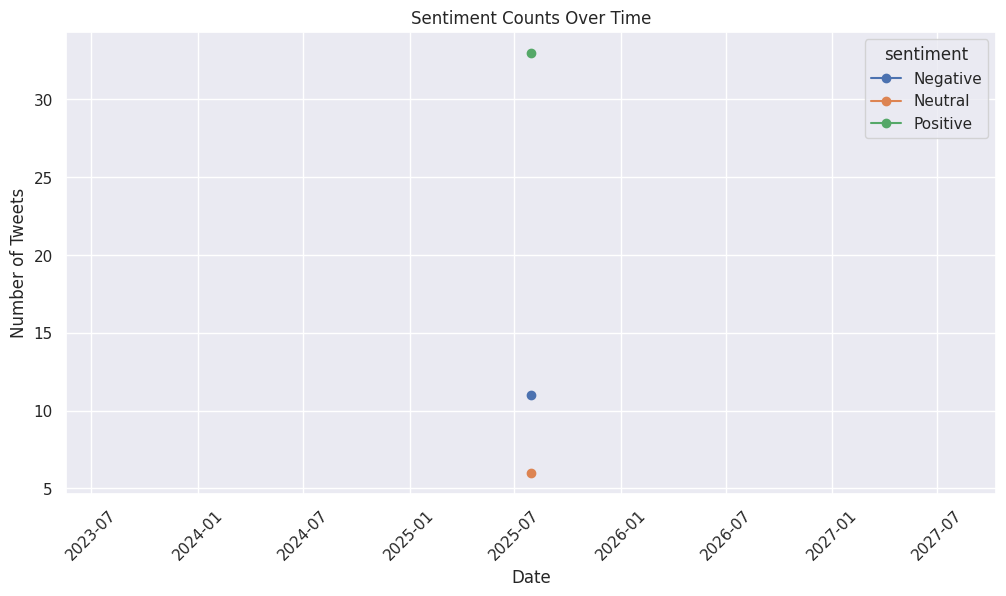

In [11]:
sentiment_over_time.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Sentiment Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()


In [12]:
df.to_csv("tweet_sentiments.csv", index=False)
print("✅ Saved to tweet_sentiments1.csv")


✅ Saved to tweet_sentiments1.csv
